 Imports

In [42]:
import numpy as np
import pandas as pd
import genData
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Load our data sets for consistant and reproducible results

In [43]:
#seed = 6156715
seed = 1528538182
testSeed = 5412654
genData.def_seed = seed

In [44]:
trainA = genData.create_A()
testA = genData.create_A(seed=testSeed)
trainA

,x,y,target
0,-50.12,29.11,1
1,12.61,50.87,1
2,22.33,58.29,1
3,78.93,-94.23,-1
4,-41.31,-25.08,-1
...,...,...,...
995,-17.98,7.35,1
996,-52.02,-83.95,-1
997,-58.32,-16.29,-1
998,68.00,-62.56,-1


In [45]:
trainB = genData.create_B(size=100000)
testB = genData.create_B(seed=testSeed,size=100000)
trainB

,x,y,target
0,-50.12,46.14,-1
1,12.61,49.41,-1
2,22.33,-87.08,-1
3,78.93,6.66,-1
4,-41.31,92.50,-1
...,...,...,...
99995,-55.02,-17.97,-1
99996,38.70,-23.48,-1
99997,89.65,-85.51,-1
99998,66.75,-56.62,-1


In [46]:
class Adaline:
    def __init__(self,seed = None,learning_rate=0.0001,bias=0.2):
        self.rng = np.random.RandomState(seed)
        self.repeats = 1000
        self.learning_rate = learning_rate
        self.bias = bias
        
        

    def fit(self,data,target,verbose=0):
        self.weights = self.rng.rand(data.shape[1],1)
        self.possible_targets = np.unique(target)
        #self.possible_targets = np.sort(np.append(self.possible_targets,[float("-inf"),float("inf")]))

        pd.set_option("display.width",None)

        if isinstance(data,pd.DataFrame):
            data = data.to_numpy().T
            
        past_errors = [float("inf")]
        for i in range(self.repeats):
            errors = []
            stats = {"x":[],"y":[],"bias":[], "Y_in":[],"t-Y":[],"Delta w1":[], "Delta w2":[],"w1":[],"w2":[],"Error":[]}
            for x_i in range(data.shape[1]):
                Y = self.bias + np.sum(data[:,[x_i]]*self.weights,axis=0)[0]
                delta = (target[x_i]-Y)
                
                deltaW = 0
                if delta != 0:
                    deltaW = self.learning_rate*delta*data[:,[x_i]]
                    self.weights = self.weights + deltaW
                    self.bias = self.bias+self.learning_rate*delta
                errors.append((delta**2))
                if verbose >= 2:
                    temp = {"x":data[:,[x_i]][0][0],"y":data[:,[x_i]][1][0],"bias":round(self.bias,4),"Y_in":round(Y,4),"t-Y":round(delta,4),"Delta w1":round(deltaW[0][0],4), "Delta w2":round(deltaW[1][0],4),"w1":round(self.weights[0][0],4),"w2":round(self.weights[1][0],4),"Error":round((delta**2),4)}
                    for k in temp:
                        stats[k].append(temp[k])

            mse = sum(errors)/len(errors)
            #stop if our mse is not changing at all
            if len(past_errors) > 10 and all(past_errors[-1] == x for x in past_errors[-10:]):
                break
            past_errors.append(mse)
            if verbose>=1:
                print("Epoch",i)
                print(mse)
                if verbose>=2:
                    df = pd.DataFrame(stats)
                    print(df)
                print("--------")
                    
            

    def predict(self,data):
        if isinstance(data,pd.DataFrame):
            data = data.to_numpy().T
        
        #get vector of predicted target values
        raw_target = np.ravel(self.bias+np.sum(data*self.weights,axis=0))
        absMat = []
        #2 dimesional array of the 
        for val in self.possible_targets:
            absMat.append(np.abs(raw_target - val))
        absMat = np.array(absMat)
        targetIndexes = np.argmin(absMat,axis=0)
        target = []
        
        for i in targetIndexes:
            target.append(self.possible_targets[i])

        return np.array(target) 

In [47]:
v = np.array([[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9]])
w = np.array([[5],[2]])
v*w,w.shape

(array([[ 5, 10, 15, 20, 25, 30, 35, 40, 45],
        [ 2,  4,  6,  8, 10, 12, 14, 16, 18]]),
 (2, 1))

In [48]:
ad = Adaline(seed)
data = np.array([[1,1,-1,-1],[1,-1,1,-1]])
target = np.array([-1,1,-1,-1])
ad.fit(trainA.loc[:,["x","y"]],trainA["target"],verbose=2)


Epoch 0
4.927295901540104
         x      y     Y_in      t-Y  Delta w1  Delta w2      w1      w2  \
0   -50.12  29.11 -33.3186  34.3186 -0.172005  0.099901  0.5182  0.1368   
1    12.61  50.87  13.6973 -12.6973 -0.016011 -0.064591  0.5022  0.0722   
2    22.33  58.29  15.6255 -14.6255 -0.032659 -0.085252  0.4695 -0.0130   
3    78.93 -94.23  38.4888 -39.4888 -0.311685  0.372103  0.1578  0.3591   
4   -41.31 -25.08 -15.3291  14.3291 -0.059194 -0.035937  0.0986  0.3231   
..     ...    ...      ...      ...       ...       ...     ...     ...   
995 -17.98   7.35   0.3052   0.6948 -0.001249  0.000511 -0.0037  0.0118   
996 -52.02 -83.95  -0.6238  -0.3762  0.001957  0.003158 -0.0017  0.0150   
997 -58.32 -16.29   0.0350  -1.0350  0.006036  0.001686  0.0043  0.0167   
998  68.00 -62.56  -0.5737  -0.4263 -0.002899  0.002667  0.0014  0.0194   
999  21.56 -59.68  -0.9469  -0.0531 -0.000114  0.000317  0.0013  0.0197   

         Error  
0    1177.7655  
1     161.2212  
2     213.9041  
3    

In [58]:
testA_res = ad.predict(testA.loc[:,["x","y"]])
testA_res

array([-1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
        1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,
        1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1

In [59]:

accuracy_score(testA["target"],testA_res)

0.985

In [51]:
ad2 = Adaline(seed,bias=100)
ad2.fit(trainB.loc[:,["x","y"]],trainB["target"],verbose=2)

Epoch 0
831.8231202203875
           x      y      Y_in       t-Y  Delta w1  Delta w2      w1      w2  \
0     -50.12  46.14   67.1099  -68.1099  0.341367 -0.314259  1.0316 -0.2774   
1      12.61  49.41   99.2973 -100.2973 -0.126475 -0.495569  0.9051 -0.7729   
2      22.33 -87.08  187.4999 -188.4999 -0.420920  1.641458  0.4842  0.8685   
3      78.93   6.66  143.9646 -144.9646 -1.144205 -0.096546 -0.6600  0.7720   
4     -41.31  92.50  198.6247 -199.6247  0.824650 -1.846529  0.1646 -1.0745   
...      ...    ...       ...       ...       ...       ...     ...     ...   
99995 -55.02 -17.97   -0.9919   -0.0081  0.000045  0.000015  0.0000 -0.0001   
99996  38.70 -23.48   -0.9923   -0.0077 -0.000030  0.000018 -0.0000 -0.0000   
99997  89.65 -85.51   -0.9917   -0.0083 -0.000075  0.000071 -0.0001  0.0000   
99998  66.75 -56.62   -1.0017    0.0017  0.000011 -0.000010 -0.0001  0.0000   
99999 -62.22  -8.93   -0.9902   -0.0098  0.000061  0.000009 -0.0000  0.0000   

            Error  
0    

In [60]:
testB_res = ad2.predict(testB.loc[:,["x","y"]])
testB_res

array([-1, -1, -1, ..., -1, -1, -1])

In [61]:
accuracy_score(testB["target"],testB_res)

0.99964

In [62]:
testB["target"].value_counts()

-1    99964
 1       36
Name: target, dtype: int64

In [63]:
testB["results"]=testB_res

In [64]:
backgroundPoints = [[],[]]
for i in range(-100,100):
    temp = []
    for j in range(-100,100):
        backgroundPoints[0].append(i*100)
        backgroundPoints[1].append(j*100)
print(np.array(backgroundPoints).shape)
backgroundPoints = genData.create_B(raw_data=backgroundPoints,size=None)
backgroundPoints

(2, 40000)


,x,y,target
0,-100.0,-100.0,-1
1,-100.0,-99.0,-1
2,-100.0,-98.0,-1
3,-100.0,-97.0,-1
4,-100.0,-96.0,-1
...,...,...,...
39995,99.0,95.0,-1
39996,99.0,96.0,-1
39997,99.0,97.0,-1
39998,99.0,98.0,-1


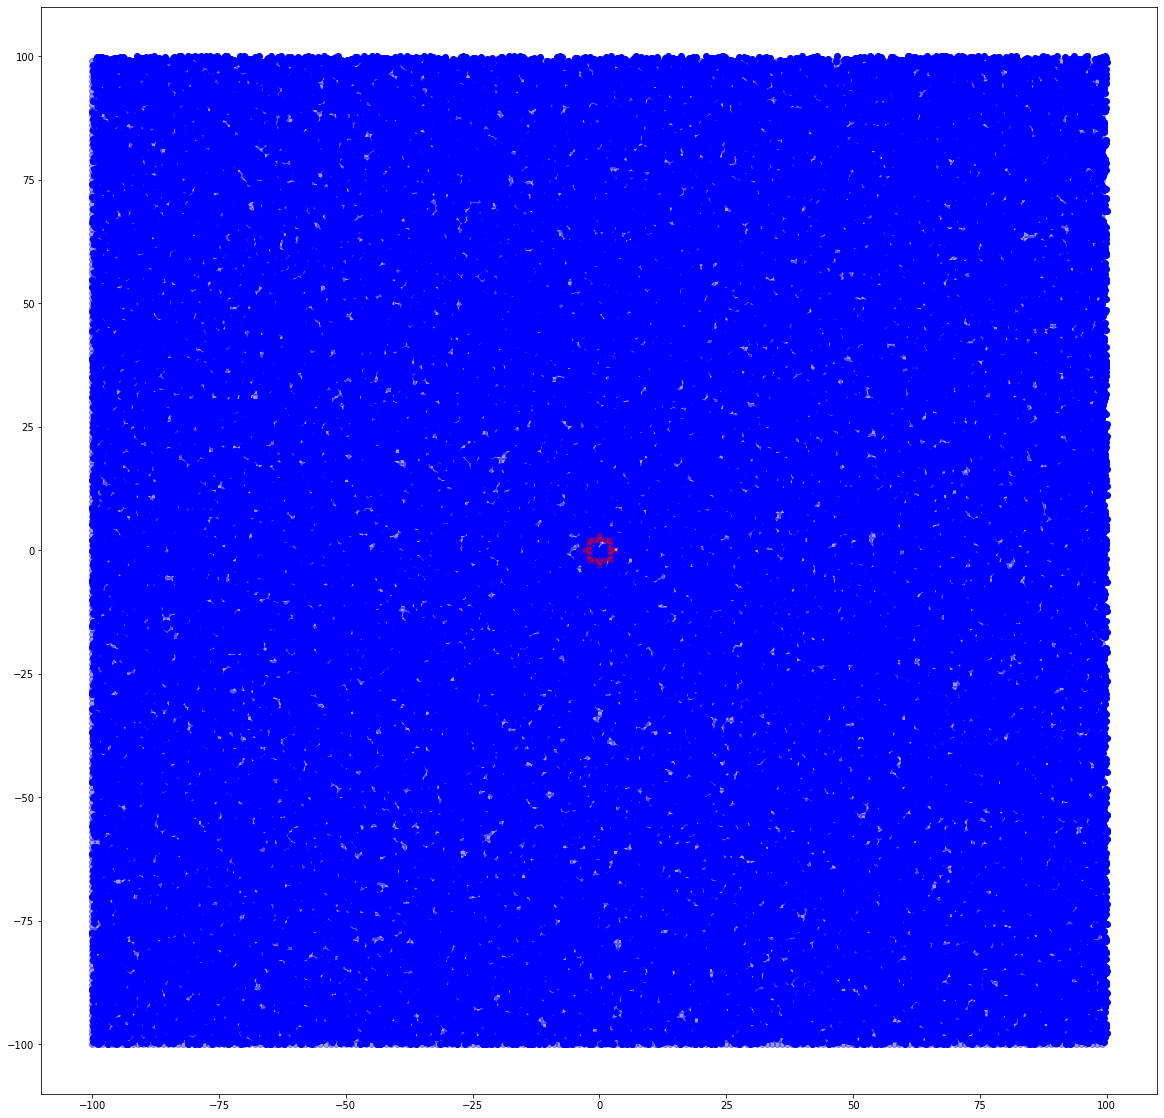

In [65]:
background_1 = backgroundPoints[backgroundPoints["target"] == 1]
background_neg_1 = backgroundPoints[backgroundPoints["target"] != 1]

targets_1 = testB[testB["results"] == 1]
targets_neg_1 = testB[testB["results"] != 1]

plt.figure(figsize=(20,20))
plt.scatter(targets_1["x"],targets_1["y"], c='r')
plt.scatter(targets_neg_1["x"],targets_neg_1["y"], c='b')
plt.scatter(background_1["x"],background_1["y"], c='r',alpha=0.4)
plt.scatter(background_neg_1["x"],background_neg_1["y"], c='b',alpha=0.4)


